In [ ]:
import numpy as np
import cv2
import pandas as pd
from scipy.ndimage import label
import matplotlib.pyplot as plt

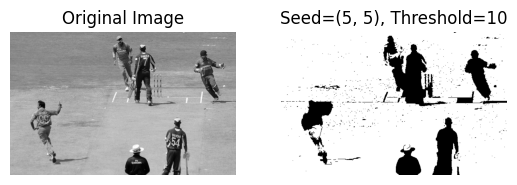

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region(image, seed, threshold):
    rows, cols = image.shape
    segmented_image = np.zeros_like(image)


    segmented_image[seed] = 255

    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    to_process = [seed]

    while to_process:
        current_pixel = to_process.pop()
        x, y = current_pixel

        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy

            if 0 <= nx < rows and 0 <= ny < cols:
                if segmented_image[nx, ny] == 0:
                    if abs(int(image[x, y]) - int(image[nx, ny])) <= threshold:
                        segmented_image[nx, ny] = 255
                        to_process.append((nx, ny))

    return segmented_image

image = cv2.imread(r"/content/cricket.jpg")

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

seed = (5, 5)
threshold = 10


segmented_image = region(image_gray, seed, threshold)


plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title(f"Seed={seed}, Threshold={threshold}")
plt.axis("off")

plt.show()


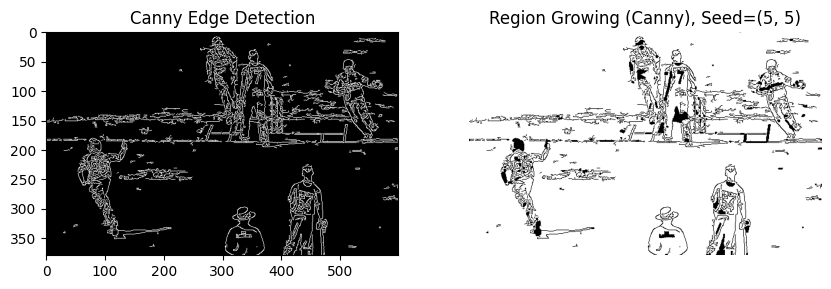

In [ ]:
def canny_edge_detection(image, low_threshold, high_threshold):
    edges = cv2.Canny(image, low_threshold, high_threshold)
    return edges

def region(image, seed, threshold):
    rows, cols = image.shape
    segmented_image = np.zeros_like(image)


    segmented_image[seed] = 255

    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    to_process = [seed]

    while to_process:
        current_pixel = to_process.pop()
        x, y = current_pixel

        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy

            if 0 <= nx < rows and 0 <= ny < cols:
                if segmented_image[nx, ny] == 0:
                    if abs(int(image[x, y]) - int(image[nx, ny])) <= threshold:
                        segmented_image[nx, ny] = 255
                        to_process.append((nx, ny))

    return segmented_image

image = cv2.imread(r"/content/cricket.jpg")

low_threshold = 50
high_threshold = 150
edge_image_canny = canny_edge_detection(image_gray, low_threshold, high_threshold)

# Apply region growing
segmented_image_canny = region(edge_image_canny, seed, threshold)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(edge_image_canny, cmap='gray')
plt.title('Canny Edge Detection')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image_canny, cmap='gray')
plt.title(f"Region Growing (Canny), Seed={seed}")
plt.axis("off")

plt.show()


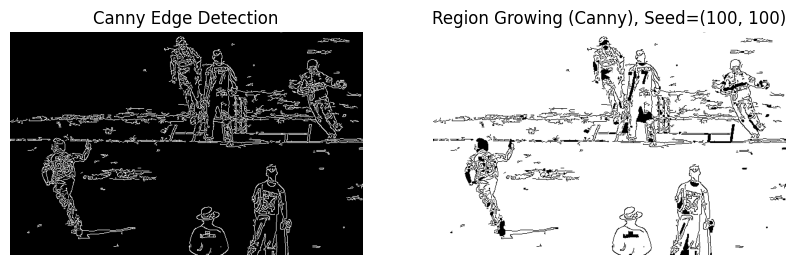

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny_edge_detection(image, low_threshold, high_threshold):
    """Applies Canny Edge Detection to the given grayscale image."""
    edges = cv2.Canny(image, low_threshold, high_threshold)
    return edges

def region(image, seed, threshold):
    """Performs region growing segmentation on an image based on intensity differences."""
    rows, cols = image.shape
    segmented_image = np.zeros_like(image)

    # Ensure seed is within bounds
    if not (0 <= seed[0] < rows and 0 <= seed[1] < cols):
        raise ValueError(f"Seed point {seed} is out of image bounds.")

    segmented_image[seed] = 255
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    to_process = [seed]

    while to_process:
        current_pixel = to_process.pop()
        x, y = current_pixel

        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy

            if 0 <= nx < rows and 0 <= ny < cols:
                if segmented_image[nx, ny] == 0:
                    if abs(int(image[x, y]) - int(image[nx, ny])) <= threshold:
                        segmented_image[nx, ny] = 255
                        to_process.append((nx, ny))

    return segmented_image

# Load the image and convert to grayscale
image_path = r"/content/cricket.jpg"  # Change to correct path if needed
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

# Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny Edge Detection
low_threshold = 50
high_threshold = 150
edge_image_canny = canny_edge_detection(image_gray, low_threshold, high_threshold)

# Define seed point (ensure it is within image bounds)
seed = (100, 100)  # Example seed point (change based on your image)
threshold = 10  # Intensity difference threshold

# Apply Region Growing
segmented_image_canny = region(edge_image_canny, seed, threshold)

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(edge_image_canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image_canny, cmap='gray')
plt.title(f"Region Growing (Canny), Seed={seed}")
plt.axis("off")

plt.show()


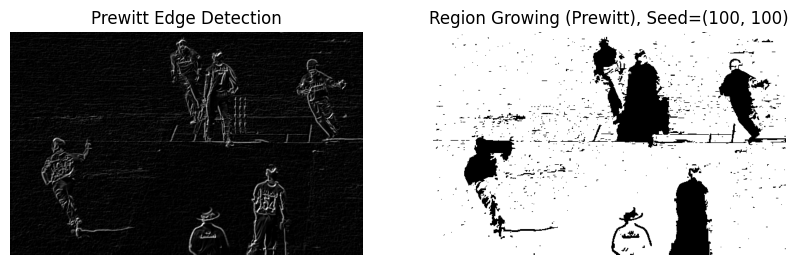

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def prewitt_edge_detection(image):
    """Applies Prewitt Edge Detection to the given grayscale image."""
    # Define Prewitt kernels
    kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # Horizontal
    kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  # Vertical

    # Apply filters using cv2.filter2D
    grad_x = cv2.filter2D(image, -1, kernel_x)
    grad_y = cv2.filter2D(image, -1, kernel_y)

    # Combine gradients (magnitude)
    prewitt_edges = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

    return prewitt_edges

def region(image, seed, threshold):
    """Performs region growing segmentation on an image based on intensity differences."""
    rows, cols = image.shape
    segmented_image = np.zeros_like(image)

    # Ensure seed is within bounds
    if not (0 <= seed[0] < rows and 0 <= seed[1] < cols):
        raise ValueError(f"Seed point {seed} is out of image bounds.")

    segmented_image[seed] = 255
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    to_process = [seed]

    while to_process:
        current_pixel = to_process.pop()
        x, y = current_pixel

        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy

            if 0 <= nx < rows and 0 <= ny < cols:
                if segmented_image[nx, ny] == 0:
                    if abs(int(image[x, y]) - int(image[nx, ny])) <= threshold:
                        segmented_image[nx, ny] = 255
                        to_process.append((nx, ny))

    return segmented_image

# Load the image and convert to grayscale
image_path = r"/content/cricket.jpg"  # Change this to the correct path
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

# Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Prewitt Edge Detection
prewitt_edges = prewitt_edge_detection(image_gray)

# Define seed point (ensure it is within image bounds)
seed = (100, 100)  # Example seed point (change based on your image)
threshold = 10  # Intensity difference threshold

# Apply Region Growing
segmented_image_prewitt = region(prewitt_edges, seed, threshold)

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image_prewitt, cmap='gray')
plt.title(f"Region Growing (Prewitt), Seed={seed}")
plt.axis("off")

plt.show()


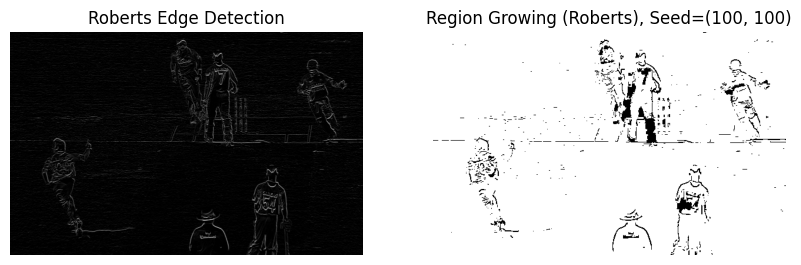

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def roberts_edge_detection(image):
    """Applies Roberts Edge Detection to the given grayscale image."""
    # Define Roberts kernels
    kernel_x = np.array([[1, 0], [0, -1]])  # Diagonal gradient (↘)
    kernel_y = np.array([[0, 1], [-1, 0]])  # Diagonal gradient (↙)

    # Apply filters using cv2.filter2D
    grad_x = cv2.filter2D(image, -1, kernel_x)
    grad_y = cv2.filter2D(image, -1, kernel_y)

    # Combine gradients (magnitude)
    roberts_edges = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

    return roberts_edges

def region(image, seed, threshold):
    """Performs region growing segmentation on an image based on intensity differences."""
    rows, cols = image.shape
    segmented_image = np.zeros_like(image)

    # Ensure seed is within bounds
    if not (0 <= seed[0] < rows and 0 <= seed[1] < cols):
        raise ValueError(f"Seed point {seed} is out of image bounds.")

    segmented_image[seed] = 255
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    to_process = [seed]

    while to_process:
        current_pixel = to_process.pop()
        x, y = current_pixel

        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy

            if 0 <= nx < rows and 0 <= ny < cols:
                if segmented_image[nx, ny] == 0:
                    if abs(int(image[x, y]) - int(image[nx, ny])) <= threshold:
                        segmented_image[nx, ny] = 255
                        to_process.append((nx, ny))

    return segmented_image

# Load the image and convert to grayscale
image_path = r"/content/cricket.jpg"  # Change this to the correct path
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

# Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Roberts Edge Detection
roberts_edges = roberts_edge_detection(image_gray)

# Define seed point (ensure it is within image bounds)
seed = (100, 100)  # Example seed point (change based on your image)
threshold = 10  # Intensity difference threshold

# Apply Region Growing
segmented_image_roberts = region(roberts_edges, seed, threshold)

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(roberts_edges, cmap='gray')
plt.title('Roberts Edge Detection')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image_roberts, cmap='gray')
plt.title(f"Region Growing (Roberts), Seed={seed}")
plt.axis("off")

plt.show()


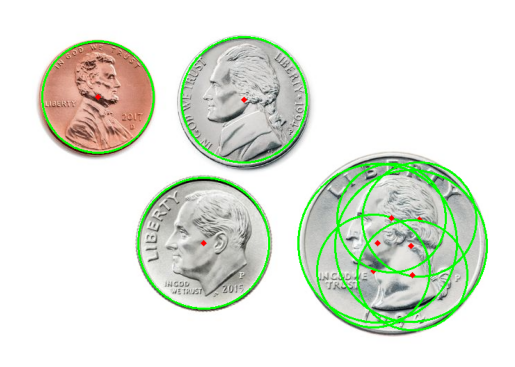

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image from file (example path)
image_path = '/content/coin.jpg'  # Change this to the correct path
coins = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Check if the image is loaded properly
if coins is None:
    raise FileNotFoundError(f"Image not found or could not be loaded: {image_path}")

# Function call for Hough Circle Detection
min_r = 75  # Minimum radius
max_r = 115  # Maximum radius

def hough_circle_detection(coins, min_r, max_r):
    gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)  # Convert image to grayscale
    blurred = cv2.medianBlur(gray, 5)  # Apply median blur to reduce noise

    # Call HoughCircles
    circles = cv2.HoughCircles(
        blurred,  # Source image (blurred and grayscaled)
        cv2.HOUGH_GRADIENT,  # Method for circle detection
        1,  # Inverse ratio of accumulator resolution to image resolution
        40,  # Minimum distance between detected circles' centers
        param1=50,  # Gradient value for edge detection
        param2=30,  # Accumulator threshold for circle detection
        minRadius=min_r,  # Minimum circle radius
        maxRadius=max_r  # Maximum circle radius
    )

    # If circles are detected
    if circles is not None:
        circles = np.uint16(np.around(circles))  # Round coordinates to integers

        # Draw the circles on the original image (create a copy to avoid modifying original)
        output = coins.copy()
        for i in circles[0, :]:
            # Draw the outer circle
            cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # Draw the center of the circle
            cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)

        return output
    else:
        print("No circles detected.")
        return coins  # Return the original image if no circles are detected

# Call the function
result_image = hough_circle_detection(coins, min_r, max_r)

# Convert the result image from BGR to RGB for displaying with matplotlib
result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(result_image_rgb)
plt.axis('off')  # Hide axes
plt.show()
